<a href="https://colab.research.google.com/github/armandossrecife/lp20231/blob/main/Geopandas_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geopandas

https://geopandas.org/

O GeoPandas é uma biblioteca Python que estende as funcionalidades do pandas para permitir o processamento e análise de dados geoespaciais. Ela combina a facilidade de uso do pandas com a capacidade de manipular dados geográficos, permitindo a realização de tarefas como leitura e escrita de dados espaciais, manipulação de geometrias, análise espacial e visualização de mapas.

Com o GeoPandas, é possível realizar tarefas como carregar e salvar dados geoespaciais em diferentes formatos (shapefile, GeoJSON, etc.), realizar operações espaciais (como interseções, uniões e buffer), realizar consultas espaciais, calcular áreas e distâncias, criar mapas temáticos e muito mais.



In [9]:
!pip install geopandas

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Mapas de Países e Continentes

Projetando dados georeferenciados e cartográficos

https://en.wikipedia.org/wiki/Geographic_coordinate_system

https://en.wikipedia.org/wiki/Latitude

https://en.wikipedia.org/wiki/Longitude

https://en.wikipedia.org/wiki/Global_Positioning_System




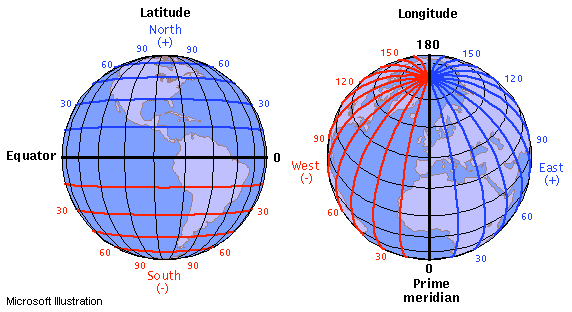

In [11]:
info_mundo_geo_referenciado = gpd.datasets.get_path("naturalearth_lowres")
info_mundo_geo_referenciado

<ipython-input-11-96d16451fbbb>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  info_mundo_geo_referenciado = gpd.datasets.get_path("naturalearth_lowres")


'/usr/local/lib/python3.10/dist-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [12]:
gdf_countries = gpd.read_file(info_mundo_geo_referenciado)
gdf_countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [13]:
type(gdf_countries)

geopandas.geodataframe.GeoDataFrame

In [14]:
gdf_countries.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [15]:
gdf_countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


<Axes: >

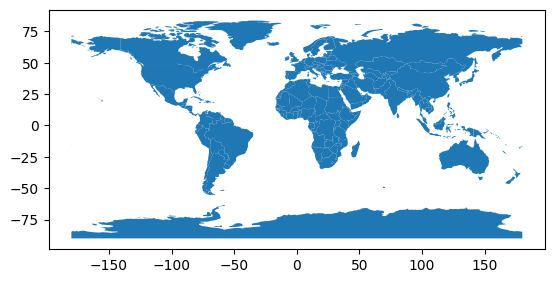

In [16]:
gdf_countries.plot()

<Axes: >

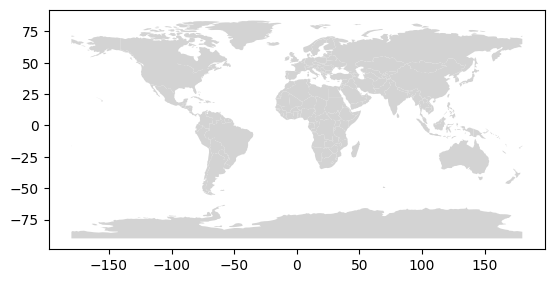

In [17]:
gdf_countries.plot(color="lightgrey")

### Informações de continentes

In [18]:
gdf_countries['continent']

0            Oceania
1             Africa
2             Africa
3      North America
4      North America
           ...      
172           Europe
173           Europe
174           Europe
175    North America
176           Africa
Name: continent, Length: 177, dtype: object

In [19]:
gdf_countries['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [20]:
gdf_countries['continent']=='South America'

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Name: continent, Length: 177, dtype: bool

In [21]:
gdf_countries['continent'] == 'Europe'

0      False
1      False
2      False
3      False
4      False
       ...  
172     True
173     True
174     True
175    False
176    False
Name: continent, Length: 177, dtype: bool

### América do Sul

In [22]:
filtro_paises_america_sul = gdf_countries['continent']=='South America'

<Axes: >

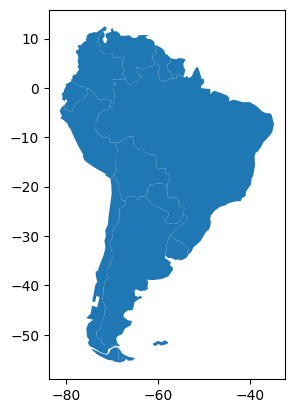

In [23]:
gdf_countries[filtro_paises_america_sul].plot()

<Axes: >

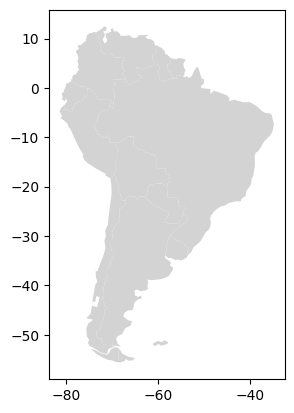

In [24]:
gdf_countries[filtro_paises_america_sul].plot(color="lightgrey")

### Brasil

In [25]:
filtro_pais_brasil = gdf_countries.query("name=='Brazil'")
filtro_pais_brasil

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


In [26]:
filtro_paises_america_sul = gdf_countries.query("continent=='South America'")
filtro_paises_america_sul

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
30,11513100.0,South America,Bolivia,BOL,40895,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0..."
31,32510453.0,South America,Peru,PER,226848,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251..."
32,50339443.0,South America,Colombia,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
40,28515829.0,South America,Venezuela,VEN,482359,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
41,782766.0,South America,Guyana,GUY,5173,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371..."


In [27]:
gdf_countries["name"]

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object

In [28]:
filtro_geopandas_pais_brasil = gdf_countries["name"] == "Brazil"

<Axes: >

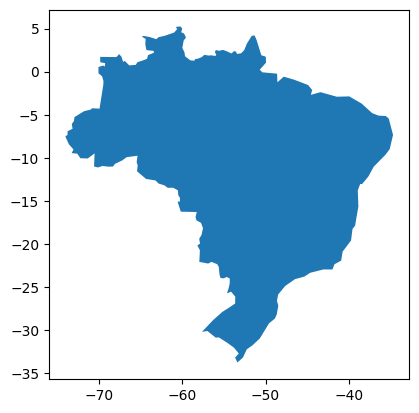

In [29]:
gdf_countries[filtro_geopandas_pais_brasil].plot()

<Axes: >

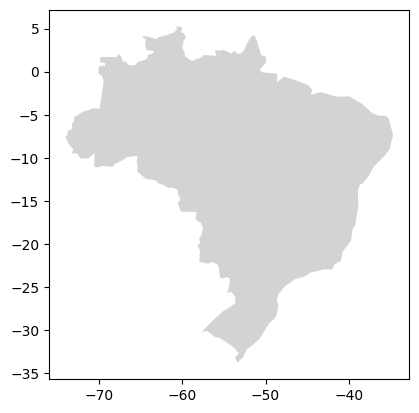

In [30]:
gdf_countries[filtro_geopandas_pais_brasil].plot(color="lightgrey")

## Outros exemplos

In [31]:
# Dataset disponiveis na lib do Geopandas
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [32]:
filtro_cidades_mundo = gpd.datasets.get_path('naturalearth_cities')

<ipython-input-32-7e728feaa9e4>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  filtro_cidades_mundo = gpd.datasets.get_path('naturalearth_cities')


### Coordenadas GPS de cidades

In [33]:
# Information by city
gdf_world_cities = gpd.read_file(filtro_cidades_mundo)
gdf_world_cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)


In [34]:
gdf_world_cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      243 non-null    object  
 1   geometry  243 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 3.9+ KB


In [35]:
filtro_paises_mundo = gpd.datasets.get_path('naturalearth_lowres')

<ipython-input-35-2157e7b68445>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  filtro_paises_mundo = gpd.datasets.get_path('naturalearth_lowres')


In [36]:
# Information by country and continent
gdf_world_country_and_continent = gpd.read_file(filtro_paises_mundo)
gdf_world_country_and_continent.sort_values("continent", inplace=True)
gdf_world_country_and_continent


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."
74,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
73,1148130.0,Africa,eSwatini,SWZ,4471,"POLYGON ((32.07167 -26.73382, 31.86806 -27.177..."
72,30366036.0,Africa,Mozambique,MOZ,15291,"POLYGON ((34.55999 -11.52002, 35.31240 -11.439..."
71,18628747.0,Africa,Malawi,MWI,7666,"POLYGON ((32.75938 -9.23060, 33.73972 -9.41715..."
...,...,...,...,...,...,...
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
42,581363.0,South America,Suriname,SUR,3697,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375..."


In [37]:
minhas_colunas = ['continent', 'geometry']

gdf_world_continent = gdf_world_country_and_continent[minhas_colunas]
gdf_world_continent

,continent,geometry
176,Africa,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."
74,Africa,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
73,Africa,"POLYGON ((32.07167 -26.73382, 31.86806 -27.177..."
72,Africa,"POLYGON ((34.55999 -11.52002, 35.31240 -11.439..."
71,Africa,"POLYGON ((32.75938 -9.23060, 33.73972 -9.41715..."
...,...,...
9,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
29,South America,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
42,South America,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375..."


<Axes: >

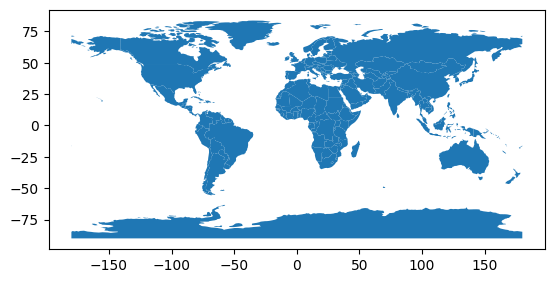

In [38]:
gdf_world_continent.plot()

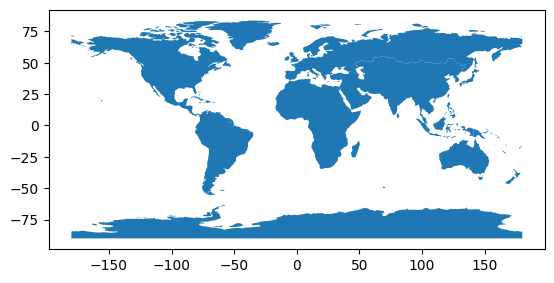

In [39]:
gdf_continents = gdf_world_continent.dissolve(by='continent')
gdf_continents.plot();
plt.show()

In [40]:
gdf_cities = gpd.read_file(filtro_cidades_mundo)
gdf_cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)


In [41]:
gdf_cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      243 non-null    object  
 1   geometry  243 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 3.9+ KB


In [42]:
gdf_world = gpd.read_file(filtro_paises_mundo)
gdf_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [43]:
gdf_world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


### Integrando Mapa Mundi e Principais cidades

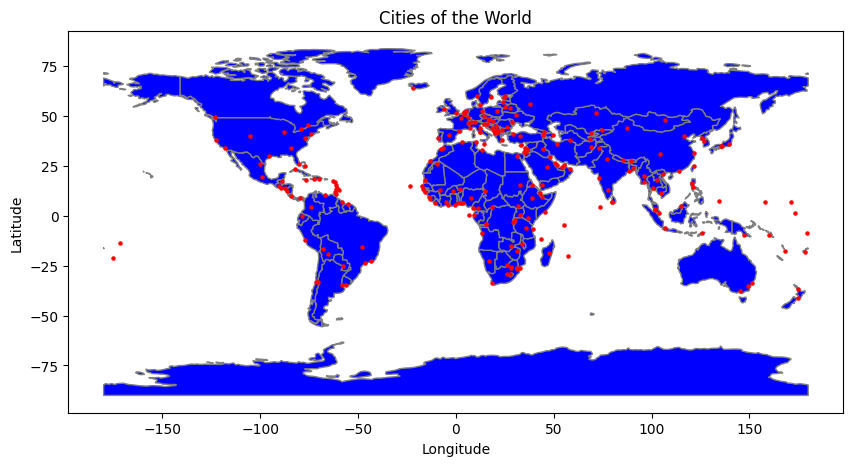

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Cities of the World')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')

gdf_world.plot(ax=ax, edgecolor='grey', facecolor='blue', linewidth=1, alpha=1)
gdf_cities.plot(ax=ax, markersize=5, color='red')

plt.show()

In [45]:
gdf_continents.head(3)

,geometry
continent,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6..."
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012..."
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13..."


In [46]:
gdf_continents.tail(3)

,geometry
continent,
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456..."
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940..."
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210..."


### Destacando um continente no mapa mundi

In [47]:
gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf_world = gdf_world[['continent', 'geometry']]
gdf_continents = gdf_world.dissolve(by='continent')

<ipython-input-47-bf1db6cb6f86>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [48]:
filtro_america_do_sul = gdf_world['continent']=='South America'
filtro_america_do_sul

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Name: continent, Length: 177, dtype: bool

In [49]:
filtro_outros_paises = gdf_world['continent']!='South America'
filtro_outros_paises

0      True
1      True
2      True
3      True
4      True
       ... 
172    True
173    True
174    True
175    True
176    True
Name: continent, Length: 177, dtype: bool

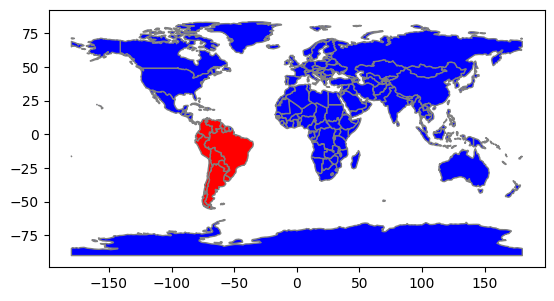

In [50]:
fig, ax = plt.subplots()

gdf_world[filtro_outros_paises].plot(ax=ax, edgecolor='grey', facecolor='blue', linewidth=1, alpha=1)
gdf_world[filtro_america_do_sul].plot(ax=ax, edgecolor='grey', facecolor='red', linewidth=1, alpha=1)

plt.show()

## Distribuição da População do Brasil

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

Informações de Geolocalização do IBGE:

https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html

In [52]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/lp/BR_UF_2022.zip

--2023-06-29 01:44:23--  https://raw.githubusercontent.com/armandossrecife/teste/main/lp/BR_UF_2022.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13717460 (13M) [application/zip]
Saving to: ‘BR_UF_2022.zip.2’

BR_UF_2022.zip.2    100%[===================>]  13.08M  --.-KB/s    in 0.08s   

2023-06-29 01:44:23 (158 MB/s) - ‘BR_UF_2022.zip.2’ saved [13717460/13717460]



In [53]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/lp/PI_Municipios_2022.zip

--2023-06-29 01:44:23--  https://raw.githubusercontent.com/armandossrecife/teste/main/lp/PI_Municipios_2022.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1858432 (1.8M) [application/zip]
Saving to: ‘PI_Municipios_2022.zip.2’

PI_Municipios_2022. 100%[===================>]   1.77M  --.-KB/s    in 0.04s   

2023-06-29 01:44:23 (41.0 MB/s) - ‘PI_Municipios_2022.zip.2’ saved [1858432/1858432]



In [54]:
!unzip BR_UF_2022.zip

Archive:  BR_UF_2022.zip
replace BR_UF_2022.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: BR_UF_2022.cpg          
replace BR_UF_2022.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BR_UF_2022.dbf          
  inflating: BR_UF_2022.prj          
  inflating: BR_UF_2022.shp          
  inflating: BR_UF_2022.shx          


In [55]:
!unzip PI_Municipios_2022.zip

Archive:  PI_Municipios_2022.zip
replace PI_Municipios_2022.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: PI_Municipios_2022.cpg  
  inflating: PI_Municipios_2022.dbf  
  inflating: PI_Municipios_2022.prj  
  inflating: PI_Municipios_2022.shp  
  inflating: PI_Municipios_2022.shx  


In [56]:
# Carregar o shapefile do mapa do Brasil
gdf_br_map = gpd.read_file('BR_UF_2022.shp')

In [57]:
gdf_br_map

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1..."
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.58680 -2.23341, -44.58696 ..."
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484..."
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.36640, -37.87109 -4.367..."
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ..."
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.79580 -7.17500, -34.79578 ..."


In [58]:
# Carregar os dados públicos (exemplo: população por estado)
dados_populacao_estados = {
    'estado': ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE',
              'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'],
    'populacao': [869265, 3351543, 4207714, 845731, 14930634, 9187103, 3055149, 4018650, 7113540, 7035055,
                   21168791, 2650129, 3344544, 8602865, 4039277, 9616621, 3281480, 11433957, 17264943, 3534165,
                   631181, 11377239, 7164788, 2318822, 2335388, 46289333, 1590248]
}
df_estados = pd.DataFrame(dados_populacao_estados)

In [59]:
df_estados

,estado,populacao
0,AC,869265
1,AL,3351543
2,AM,4207714
3,AP,845731
4,BA,14930634
5,CE,9187103
6,DF,3055149
7,ES,4018650
8,GO,7113540
9,MA,7035055


In [60]:
gdf_br_map.columns

Index(['CD_UF', 'NM_UF', 'SIGLA_UF', 'NM_REGIAO', 'AREA_KM2', 'geometry'], dtype='object')

In [61]:
df_estados.columns

Index(['estado', 'populacao'], dtype='object')

In [62]:
# Fazer um merge dos dados com o shapefile usando a coluna 'estado'
gdf_dados_merged = gdf_br_map.merge(df_estados, left_on='SIGLA_UF', right_on='estado')

In [63]:
gdf_dados_merged

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,estado,populacao
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...",AC,869265
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...",AM,4207714
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...",PA,8602865
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...",AP,845731
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1...",TO,1590248
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.58680 -2.23341, -44.58696 ...",MA,7035055
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484...",PI,3281480
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.36640, -37.87109 -4.367...",CE,9187103
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ...",RN,3534165
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.79580 -7.17500, -34.79578 ...",PB,4039277


<Axes: >

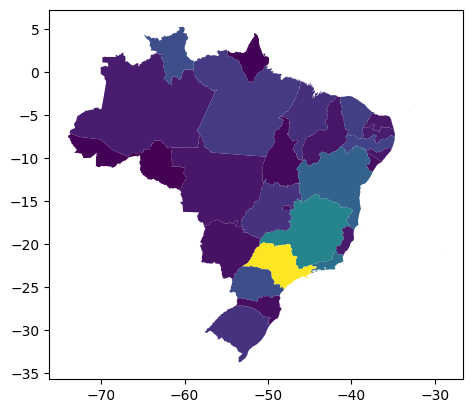

In [64]:
gdf_dados_merged.plot(column='populacao')

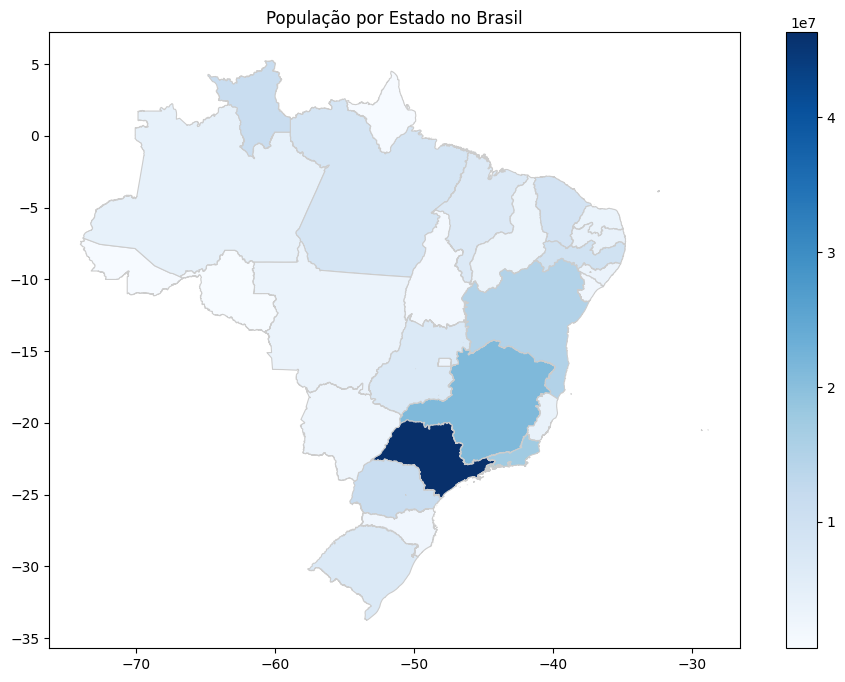

In [65]:
# Plotar o mapa com os dados
fig, ax = plt.subplots(figsize=(12, 8))

gdf_dados_merged.plot(column='populacao', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurar o título do mapa
ax.set_title('População por Estado no Brasil')

# Exibir o mapa
plt.show()

## Municipios do Piaui

Criando GeoDataFrames a partir de DataFrames

https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

In [141]:
# Carregar o shapefile do mapa do Piaui
gdf_pi_map = gpd.read_file('PI_Municipios_2022.shp')

In [142]:
gdf_pi_map

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2200053,Acauã,PI,1280.838,"POLYGON ((-40.84193 -8.17436, -40.84180 -8.174..."
1,2200103,Agricolândia,PI,112.392,"POLYGON ((-42.72187 -5.79087, -42.72189 -5.790..."
2,2200202,Água Branca,PI,96.843,"POLYGON ((-42.60366 -5.89121, -42.60364 -5.891..."
3,2200251,Alagoinha do Piauí,PI,535.890,"POLYGON ((-40.85815 -7.00077, -40.85443 -7.020..."
4,2200277,Alegrete do Piauí,PI,243.732,"POLYGON ((-40.72726 -7.24298, -40.73003 -7.244..."
...,...,...,...,...,...
219,2211357,Várzea Branca,PI,450.429,"POLYGON ((-42.77291 -9.30460, -42.77285 -9.305..."
220,2211407,Várzea Grande,PI,236.453,"POLYGON ((-42.27750 -6.59741, -42.27760 -6.597..."
221,2211506,Vera Mendes,PI,341.974,"POLYGON ((-41.51008 -7.67438, -41.51009 -7.674..."
222,2211605,Vila Nova do Piauí,PI,221.627,"POLYGON ((-40.87577 -7.22549, -40.87611 -7.226..."


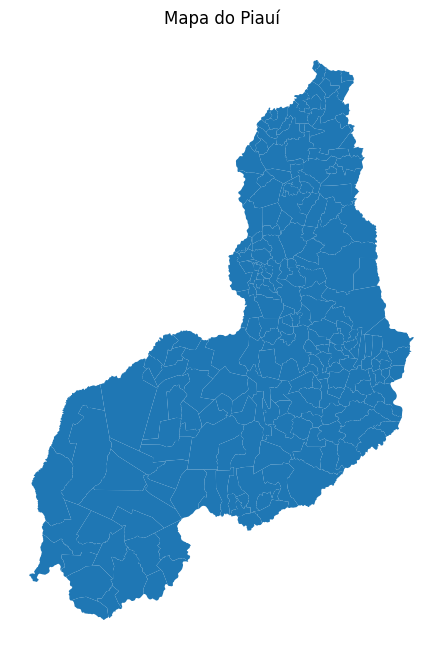

In [143]:
# Plotar o mapa do Piaui
fig, ax = plt.subplots(figsize=(12, 8))

gdf_pi_map.plot(ax=ax)

# Configurar o título do mapa
ax.set_title('Mapa do Piauí')
# Remover os eixos
ax.axis('off')
# Exibir o mapa
plt.show()

Para obter os polígonos georeferenciados das cidades do PI é preciso fazer o upload dos arquivos BR_Municipios_2022* do IBGE malhas territoriais - https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html

In [69]:
# Carregar o shapefile do mapa do Piaui
gdf_municipios_map = gpd.read_file('BR_Municipios_2022.shp')


In [102]:
!ls -liath BR_Municipios_2022.shp

1310824 -rw-r--r-- 1 root root 259M Jun 29 02:11 BR_Municipios_2022.shp


Filtra apenas os dados referentes aos municípios do PI

In [144]:
gdf_municipios_map.query("SIGLA_UF=='PI'")

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
667,2200053,Acauã,PI,1280.838,"POLYGON ((-40.84193 -8.17436, -40.84180 -8.174..."
668,2200103,Agricolândia,PI,112.392,"POLYGON ((-42.72187 -5.79087, -42.72189 -5.790..."
669,2200202,Água Branca,PI,96.843,"POLYGON ((-42.60366 -5.89121, -42.60364 -5.891..."
670,2200251,Alagoinha do Piauí,PI,535.890,"POLYGON ((-40.85815 -7.00077, -40.85443 -7.020..."
671,2200277,Alegrete do Piauí,PI,243.732,"POLYGON ((-40.72726 -7.24298, -40.73003 -7.244..."
...,...,...,...,...,...
886,2211357,Várzea Branca,PI,450.429,"POLYGON ((-42.77291 -9.30460, -42.77285 -9.305..."
887,2211407,Várzea Grande,PI,236.453,"POLYGON ((-42.27750 -6.59741, -42.27760 -6.597..."
888,2211506,Vera Mendes,PI,341.974,"POLYGON ((-41.51008 -7.67438, -41.51009 -7.674..."
889,2211605,Vila Nova do Piauí,PI,221.627,"POLYGON ((-40.87577 -7.22549, -40.87611 -7.226..."


In [145]:
gdf_cidades_pi = gdf_municipios_map.query("SIGLA_UF=='PI'")
gdf_cidades_pi

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
667,2200053,Acauã,PI,1280.838,"POLYGON ((-40.84193 -8.17436, -40.84180 -8.174..."
668,2200103,Agricolândia,PI,112.392,"POLYGON ((-42.72187 -5.79087, -42.72189 -5.790..."
669,2200202,Água Branca,PI,96.843,"POLYGON ((-42.60366 -5.89121, -42.60364 -5.891..."
670,2200251,Alagoinha do Piauí,PI,535.890,"POLYGON ((-40.85815 -7.00077, -40.85443 -7.020..."
671,2200277,Alegrete do Piauí,PI,243.732,"POLYGON ((-40.72726 -7.24298, -40.73003 -7.244..."
...,...,...,...,...,...
886,2211357,Várzea Branca,PI,450.429,"POLYGON ((-42.77291 -9.30460, -42.77285 -9.305..."
887,2211407,Várzea Grande,PI,236.453,"POLYGON ((-42.27750 -6.59741, -42.27760 -6.597..."
888,2211506,Vera Mendes,PI,341.974,"POLYGON ((-41.51008 -7.67438, -41.51009 -7.674..."
889,2211605,Vila Nova do Piauí,PI,221.627,"POLYGON ((-40.87577 -7.22549, -40.87611 -7.226..."


In [146]:
lista_cidades_pi = gdf_cidades_pi['NM_MUN'].to_list()
print(lista_cidades_pi)

['Acauã', 'Agricolândia', 'Água Branca', 'Alagoinha do Piauí', 'Alegrete do Piauí', 'Alto Longá', 'Altos', 'Alvorada do Gurguéia', 'Amarante', 'Angical do Piauí', 'Anísio de Abreu', 'Antônio Almeida', 'Aroazes', 'Aroeiras do Itaim', 'Arraial', 'Assunção do Piauí', 'Avelino Lopes', 'Baixa Grande do Ribeiro', "Barra D'Alcântara", 'Barras', 'Barreiras do Piauí', 'Barro Duro', 'Batalha', 'Bela Vista do Piauí', 'Belém do Piauí', 'Beneditinos', 'Bertolínia', 'Betânia do Piauí', 'Boa Hora', 'Bocaina', 'Bom Jesus', 'Bom Princípio do Piauí', 'Bonfim do Piauí', 'Boqueirão do Piauí', 'Brasileira', 'Brejo do Piauí', 'Buriti dos Lopes', 'Buriti dos Montes', 'Cabeceiras do Piauí', 'Cajazeiras do Piauí', 'Cajueiro da Praia', 'Caldeirão Grande do Piauí', 'Campinas do Piauí', 'Campo Alegre do Fidalgo', 'Campo Grande do Piauí', 'Campo Largo do Piauí', 'Campo Maior', 'Canavieira', 'Canto do Buriti', 'Capitão de Campos', 'Capitão Gervásio Oliveira', 'Caracol', 'Caraúbas do Piauí', 'Caridade do Piauí', 'Ca

In [76]:
!pip install geopy

Cria uma função para obter os dados de GPS de cada cidade do PI

GeoPy - https://geopy.readthedocs.io

Geopy is a Python client for several popular geocoding web services.

Geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.



In [147]:
from geopy.geocoders import Nominatim
import pandas as pd

def get_city_coordinates(city_name):
    geolocator = Nominatim(user_agent='my_app')
    location = geolocator.geocode(city_name + ', Piauí, Brazil')
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

In [148]:
# DataFrame para armazenar as coordenadas
dados_cidade_lat_long = {'City': [], 'Latitude': [], 'Longitude': []}

In [149]:
# Obter as coordenadas para cada cidade
for i, city in enumerate(lista_cidades_pi):
    lat, lon = get_city_coordinates(city)
    print(f'{i+1}: {city}, {lat}, {lon}')
    dados_cidade_lat_long['City'].append(city)
    dados_cidade_lat_long['Latitude'].append(lat)
    dados_cidade_lat_long['Longitude'].append(lon)

1: Acauã, -8.219542, -41.083059
2: Agricolândia, -5.7967843, -42.6605131
3: Água Branca, -5.8913922, -42.6361148
4: Alagoinha do Piauí, -7.0090952, -40.939675
5: Alegrete do Piauí, -7.2440138, -40.8602296
6: Alto Longá, -5.2549051, -42.2072388
7: Altos, -5.0393915, -42.4611694
8: Alvorada do Gurguéia, -8.4465288, -43.8655915
9: Amarante, -6.2459374, -42.8476238
10: Angical do Piauí, -6.0872666, -42.7366138
11: Anísio de Abreu, -9.183959, -43.049115
12: Antônio Almeida, -7.2186016, -44.1950248
13: Aroazes, -6.1109109, -41.7881792
14: Aroeiras do Itaim, -7.2797031, -41.5629681
15: Arraial, -6.6541632, -42.5335332
16: Assunção do Piauí, -5.8608718, -41.0492387
17: Avelino Lopes, -10.1346855, -43.9489525
18: Baixa Grande do Ribeiro, -7.862861, -45.2113289
19: Barra D'Alcântara, -6.5209258, -42.1071089
20: Barras, -4.2446153, -42.2920241
21: Barreiras do Piauí, -9.9224524, -45.4763776
22: Barro Duro, -5.8180139, -42.5106589
23: Batalha, -4.022391, -42.0780926
24: Bela Vista do Piauí, -7.971

In [150]:
# Criar DataFrame com os dados
df_cidades_pi = pd.DataFrame(dados_cidade_lat_long)

# Exibir o resultado
df_cidades_pi

,City,Latitude,Longitude
0,Acauã,-8.219542,-41.083059
1,Agricolândia,-5.796784,-42.660513
2,Água Branca,-5.891392,-42.636115
3,Alagoinha do Piauí,-7.009095,-40.939675
4,Alegrete do Piauí,-7.244014,-40.860230
...,...,...,...
219,Várzea Branca,-9.237188,-42.964378
220,Várzea Grande,-6.546083,-42.248040
221,Vera Mendes,-7.604163,-41.482789
222,Vila Nova do Piauí,-7.142922,-40.937856


In [133]:
filtro_dados_teresina = df_cidades_pi['City'] == 'Teresina'
filtro_dados_teresina

0      False
1      False
2      False
3      False
4      False
       ...  
219    False
220    False
221    False
222    False
223    False
Name: City, Length: 224, dtype: bool

In [151]:
df_cidades_pi[filtro_dados_teresina]

,City,Latitude,Longitude
215,Teresina,-5.08964,-42.809588


In [152]:
type(df_cidades_pi)

pandas.core.frame.DataFrame

Converte um DataFrame para um GeoDataFrame

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html

In [153]:
from shapely.geometry import Point

# DataFrame com os dados de cidade, latitude e longitude
df_cidades_pi

# Converter as coordenadas para objetos Point
geometry = [Point(lon, lat) for lon, lat in zip(df_cidades_pi['Longitude'], df_cidades_pi['Latitude'])]

# Criar um GeoDataFrame com os dados
gdf_cidades_pi = gpd.GeoDataFrame(df_cidades_pi, geometry=geometry)

# Exibir o GeoDataFrame
gdf_cidades_pi

,City,Latitude,Longitude,geometry
0,Acauã,-8.219542,-41.083059,POINT (-41.08306 -8.21954)
1,Agricolândia,-5.796784,-42.660513,POINT (-42.66051 -5.79678)
2,Água Branca,-5.891392,-42.636115,POINT (-42.63611 -5.89139)
3,Alagoinha do Piauí,-7.009095,-40.939675,POINT (-40.93968 -7.00910)
4,Alegrete do Piauí,-7.244014,-40.860230,POINT (-40.86023 -7.24401)
...,...,...,...,...
219,Várzea Branca,-9.237188,-42.964378,POINT (-42.96438 -9.23719)
220,Várzea Grande,-6.546083,-42.248040,POINT (-42.24804 -6.54608)
221,Vera Mendes,-7.604163,-41.482789,POINT (-41.48279 -7.60416)
222,Vila Nova do Piauí,-7.142922,-40.937856,POINT (-40.93786 -7.14292)


In [154]:
gdf_pi_map

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,2200053,Acauã,PI,1280.838,"POLYGON ((-40.84193 -8.17436, -40.84180 -8.174..."
1,2200103,Agricolândia,PI,112.392,"POLYGON ((-42.72187 -5.79087, -42.72189 -5.790..."
2,2200202,Água Branca,PI,96.843,"POLYGON ((-42.60366 -5.89121, -42.60364 -5.891..."
3,2200251,Alagoinha do Piauí,PI,535.890,"POLYGON ((-40.85815 -7.00077, -40.85443 -7.020..."
4,2200277,Alegrete do Piauí,PI,243.732,"POLYGON ((-40.72726 -7.24298, -40.73003 -7.244..."
...,...,...,...,...,...
219,2211357,Várzea Branca,PI,450.429,"POLYGON ((-42.77291 -9.30460, -42.77285 -9.305..."
220,2211407,Várzea Grande,PI,236.453,"POLYGON ((-42.27750 -6.59741, -42.27760 -6.597..."
221,2211506,Vera Mendes,PI,341.974,"POLYGON ((-41.51008 -7.67438, -41.51009 -7.674..."
222,2211605,Vila Nova do Piauí,PI,221.627,"POLYGON ((-40.87577 -7.22549, -40.87611 -7.226..."


In [155]:
# pi_map e gdf_cidades_pi
# Fazer um merge dos dados com usando a coluna NM_MUN e City
dados_cidades_pi_merged = gdf_pi_map.merge(gdf_cidades_pi, left_on='NM_MUN', right_on='City')

In [156]:
type(dados_cidades_pi_merged)

pandas.core.frame.DataFrame

In [157]:
dados_cidades_pi_merged

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry_x,City,Latitude,Longitude,geometry_y
0,2200053,Acauã,PI,1280.838,"POLYGON ((-40.84193 -8.17436, -40.84180 -8.174...",Acauã,-8.219542,-41.083059,POINT (-41.08306 -8.21954)
1,2200103,Agricolândia,PI,112.392,"POLYGON ((-42.72187 -5.79087, -42.72189 -5.790...",Agricolândia,-5.796784,-42.660513,POINT (-42.66051 -5.79678)
2,2200202,Água Branca,PI,96.843,"POLYGON ((-42.60366 -5.89121, -42.60364 -5.891...",Água Branca,-5.891392,-42.636115,POINT (-42.63611 -5.89139)
3,2200251,Alagoinha do Piauí,PI,535.890,"POLYGON ((-40.85815 -7.00077, -40.85443 -7.020...",Alagoinha do Piauí,-7.009095,-40.939675,POINT (-40.93968 -7.00910)
4,2200277,Alegrete do Piauí,PI,243.732,"POLYGON ((-40.72726 -7.24298, -40.73003 -7.244...",Alegrete do Piauí,-7.244014,-40.860230,POINT (-40.86023 -7.24401)
...,...,...,...,...,...,...,...,...,...
219,2211357,Várzea Branca,PI,450.429,"POLYGON ((-42.77291 -9.30460, -42.77285 -9.305...",Várzea Branca,-9.237188,-42.964378,POINT (-42.96438 -9.23719)
220,2211407,Várzea Grande,PI,236.453,"POLYGON ((-42.27750 -6.59741, -42.27760 -6.597...",Várzea Grande,-6.546083,-42.248040,POINT (-42.24804 -6.54608)
221,2211506,Vera Mendes,PI,341.974,"POLYGON ((-41.51008 -7.67438, -41.51009 -7.674...",Vera Mendes,-7.604163,-41.482789,POINT (-41.48279 -7.60416)
222,2211605,Vila Nova do Piauí,PI,221.627,"POLYGON ((-40.87577 -7.22549, -40.87611 -7.226...",Vila Nova do Piauí,-7.142922,-40.937856,POINT (-40.93786 -7.14292)


In [158]:
dados_cidades_pi_merged2 = dados_cidades_pi_merged[['NM_MUN', 'geometry_y']]
dados_cidades_pi_merged2.rename(columns = {'NM_MUN':'name', 'geometry_y':'geometry'}, inplace = True)
dados_cidades_pi_merged2

<ipython-input-158-8d85c197e02f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_cidades_pi_merged2.rename(columns = {'NM_MUN':'name', 'geometry_y':'geometry'}, inplace = True)


,name,geometry
0,Acauã,POINT (-41.08306 -8.21954)
1,Agricolândia,POINT (-42.66051 -5.79678)
2,Água Branca,POINT (-42.63611 -5.89139)
3,Alagoinha do Piauí,POINT (-40.93968 -7.00910)
4,Alegrete do Piauí,POINT (-40.86023 -7.24401)
...,...,...
219,Várzea Branca,POINT (-42.96438 -9.23719)
220,Várzea Grande,POINT (-42.24804 -6.54608)
221,Vera Mendes,POINT (-41.48279 -7.60416)
222,Vila Nova do Piauí,POINT (-40.93786 -7.14292)


In [159]:
type(dados_cidades_pi_merged2)

pandas.core.frame.DataFrame

In [160]:
gdf_pi_map.rename(columns = {'NM_MUN':'name'}, inplace = True)
gdf_pi_map

,CD_MUN,name,SIGLA_UF,AREA_KM2,geometry
0,2200053,Acauã,PI,1280.838,"POLYGON ((-40.84193 -8.17436, -40.84180 -8.174..."
1,2200103,Agricolândia,PI,112.392,"POLYGON ((-42.72187 -5.79087, -42.72189 -5.790..."
2,2200202,Água Branca,PI,96.843,"POLYGON ((-42.60366 -5.89121, -42.60364 -5.891..."
3,2200251,Alagoinha do Piauí,PI,535.890,"POLYGON ((-40.85815 -7.00077, -40.85443 -7.020..."
4,2200277,Alegrete do Piauí,PI,243.732,"POLYGON ((-40.72726 -7.24298, -40.73003 -7.244..."
...,...,...,...,...,...
219,2211357,Várzea Branca,PI,450.429,"POLYGON ((-42.77291 -9.30460, -42.77285 -9.305..."
220,2211407,Várzea Grande,PI,236.453,"POLYGON ((-42.27750 -6.59741, -42.27760 -6.597..."
221,2211506,Vera Mendes,PI,341.974,"POLYGON ((-41.51008 -7.67438, -41.51009 -7.674..."
222,2211605,Vila Nova do Piauí,PI,221.627,"POLYGON ((-40.87577 -7.22549, -40.87611 -7.226..."


Cria um GeoDataFrame com o GPS de cada cidade do PI

In [161]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame from the DataFrame
gdf_cidades_pi = gpd.GeoDataFrame(dados_cidades_pi_merged2, geometry=geometry)

# Print the GeoDataFrame
gdf_cidades_pi

,name,geometry
0,Acauã,POINT (-41.08306 -8.21954)
1,Agricolândia,POINT (-42.66051 -5.79678)
2,Água Branca,POINT (-42.63611 -5.89139)
3,Alagoinha do Piauí,POINT (-40.93968 -7.00910)
4,Alegrete do Piauí,POINT (-40.86023 -7.24401)
...,...,...
219,Várzea Branca,POINT (-42.96438 -9.23719)
220,Várzea Grande,POINT (-42.24804 -6.54608)
221,Vera Mendes,POINT (-41.48279 -7.60416)
222,Vila Nova do Piauí,POINT (-40.93786 -7.14292)


In [162]:
type(gdf_cidades_pi)

geopandas.geodataframe.GeoDataFrame

Mostra os dados de GPS de Teresina

In [163]:
filtro_teresina = gdf_cidades_pi['name'] == 'Teresina'

In [164]:
gdf_cidades_pi[filtro_teresina]

,name,geometry
215,Teresina,POINT (-42.80959 -5.08964)


Plota o mapa do PI com os GPS de cada cidade

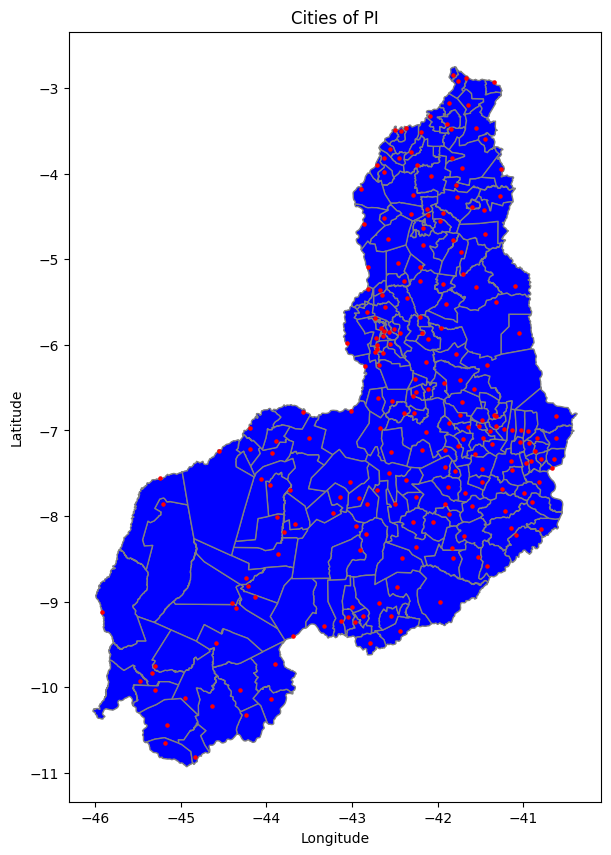

In [165]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Cities of PI')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_aspect('equal')

gdf_pi_map.plot(ax=ax, edgecolor='grey', facecolor='blue', linewidth=1, alpha=1)
gdf_cidades_pi.plot(ax=ax, markersize=5, color='red')

plt.show()

Mais exemplos em:
https://github.com/MRobalinho/GeoPandas_Brasil/tree/master/Some_Examples